## 1.
### (a)
$g(z) + g(-z) = \frac{1}{1+e^{-z}} + \frac{1}{1+e^z} = \frac{2+e^{-z}+e^{z}}{(1+e^{-z})(1+e^{z})} = \frac{2+e^{-z}+e^{z}}{1+e^{-z}e^{z}+e^{-z}+e^{z}} = \frac{2+e^{-z}+e^{z}}{2+e^{-z}+e^{z}} = 1$

### (b)
$g'(z) = \frac{e^{-z}}{(1+e^{-z})^2} = \frac{1}{e^z (1+e^{-z})^2} = \frac{1}{e^z (1+2e^{-z}+e^{-2z})} = \frac{1}{e^z+e^{-z}+2} = \frac{1}{(1+e^{-z})(1+e^{z})} = g(z)g(-z) = g(z)[1-g(z)]$


### (c)
From (b), $g'(z) = g(z)g(-z)$. Then $g'(-z) = g(-z)g(z) = g(z)$

### (d)
By chain rule and (b)(c), $g''(z) = [g(z)g(-z)]' = g(z)'g(-z) + g(z)g'(-z) = g(z)[g(-z)]^2 - [g(z)]^2g(-z) = g(z)g(-z)[g(-z)-g(z)]$

## 2.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore') 

C:\Users\ThinkPad\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
df = pd.read_csv('iris-data.csv')
Iris = df.to_numpy()
y = Iris[:,-1]
y = y.reshape((len(y),1))
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.838667,3.054667,3.758667,1.201333
std,0.804416,0.433123,1.764420,0.766320
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Removing all null values row
df = df.dropna(subset=['petal_width_cm'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### Consider "Iris-setosa" and "Iris-versicolor"

In [6]:
final_df = df[df['class']!='Iris-virginica']
final_df.head(150)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor


### Label Encoding

In [7]:
final_df2 = final_df
final_df['class'].replace(["Iris-setosa","Iris-versicolor"],[1,0],inplace=True)
setosa_x = final_df['sepal_length_cm'][0:50]
setosa_y = final_df['sepal_width_cm'][0:50]
versicolor_x = final_df['sepal_length_cm'][50:]
versicolor_y = final_df['sepal_width_cm'][50:]
final_df.head(150)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0
96,5.7,2.9,4.2,1.3,0
97,6.2,2.9,4.3,1.3,0
98,5.1,2.5,3.0,1.1,0


In [8]:
final_df2 = final_df2.drop(['petal_length_cm', 'petal_width_cm'], axis=1)
final_df2

,sepal_length_cm,sepal_width_cm,class
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
95,5.7,3.0,0
96,5.7,2.9,0
97,6.2,2.9,0
98,5.1,2.5,0


In [9]:
Y = []
target = final_df2['class']
#label Iris-setosa as -1, Iris-versicolor as 1
for i in target:
    if(i == 1):
        Y.append(-1)
    else:
        Y.append(1)

In [10]:
final_df2 = final_df2.drop(['class'], axis=1)
final_df2

,sepal_length_cm,sepal_width_cm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


### Model Construction

In [11]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)


### Model functions

In [12]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]

    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    cost = -(1/m)*(np.sum((Y.T*np.log(final_result)) + (1-Y.T)*(np.log(1-final_result))))

    dw = (1/m)*(np.dot(X.T,(final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))

    grads = {"dw": dw, "db": db}

    return grads, cost

def model_predict(w, b, X, Y, learning_rate, no_iterations, p):
    costs = []
    for i in range(no_iterations):

        grads, cost = model_optimize(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * (dw.T)
        b = b - learning_rate * db

        if (i % 1000 == 0):
            costs.append(cost)
            if(p == True):
                print("Cost after %i iteration is %f" %(i, cost))

    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}

    return coeff, gradient, costs

def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [13]:
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.3, random_state=42)

In [14]:
X_tr_arr = X_train
print('Training Input Shape', (X_tr_arr.shape))
X_ts_arr = X_test
print('Testing Input Shape', (X_ts_arr.shape))
y_tr_arr = y_train.values
print('Training Output Shape', (y_tr_arr.shape))
y_ts_arr = y_test.values
print('Testing Output Shape', (y_ts_arr.shape))

Training Input Shape (70, 4)
Testing Input Shape (30, 4)
Training Output Shape (70, 1)
Testing Output Shape (30, 1)


In [15]:
# number of features
n_features = X_tr_arr.shape[1]
print('number of features', n_features)
w, b = weightInitialization(n_features)

number of features 4


In [16]:
# Gradient descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.01, no_iterations=10000, p = True)
costs_tr = costs

Cost after 0 iteration is 0.693147
Cost after 1000 iteration is 0.051068
Cost after 2000 iteration is 0.027257
Cost after 3000 iteration is 0.018872
Cost after 4000 iteration is 0.014549
Cost after 5000 iteration is 0.011897
Cost after 6000 iteration is 0.010097
Cost after 7000 iteration is 0.008792
Cost after 8000 iteration is 0.007801
Cost after 9000 iteration is 0.007021


In [17]:
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept', b)

Optimized weights [[-1.1329834   1.60977792 -2.09053532 -2.14953509]]
Optimized intercept -0.2512582333167957


In [18]:
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)

m_tr = X_tr_arr.shape[0]
m_ts = X_ts_arr.shape[0]

y_tr_pred = predict(final_train_pred, m_tr)
#y_tr_pred.reshape(1,66)
#y_tr_arr.reshape(66,1)
print('Training data', sum(sum(y_tr_arr)))
print('Training prediction', sum(sum(y_tr_pred)))

Training data 33
Training prediction 33.0


In [19]:
y_ts_pred = predict(final_test_pred, m_ts)
y_ts_pred.reshape(1,30)
y_ts_arr.reshape(30,1)
print(y_ts_pred)
print(y_ts_arr.T)
print('Testing Accuracy', np.dot(y_ts_pred, y_ts_arr))

[[0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.
  0. 1. 1. 0. 1. 0.]]
[[0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0]]
Testing Accuracy [[17.]]


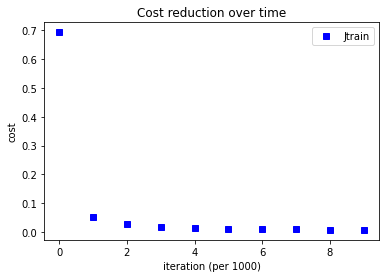

In [20]:
plt.plot(costs_tr, 'bs', label='Jtrain')
plt.ylabel('cost')
plt.xlabel('iteration (per 1000)')
plt.title('Cost reduction over time')
plt.legend(loc='best')
plt.show()

### Learning Curve

In [21]:
# Gradient descent test
coeff, gradient, costs = model_predict(w, b, X_ts_arr, y_ts_arr, learning_rate=0.01, no_iterations=10000, p=True)
costs_ts = costs
print(costs_tr)
print(type(costs_tr))

Cost after 0 iteration is 0.003435
Cost after 1000 iteration is 0.003187
Cost after 2000 iteration is 0.002973
Cost after 3000 iteration is 0.002787
Cost after 4000 iteration is 0.002623
Cost after 5000 iteration is 0.002479
Cost after 6000 iteration is 0.002350
Cost after 7000 iteration is 0.002234
Cost after 8000 iteration is 0.002129
Cost after 9000 iteration is 0.002034
[0.6931471805599454, 0.051067979173414844, 0.027256646470657692, 0.018872202654509795, 0.014549082716272843, 0.011896955995070414, 0.010097234018840726, 0.008792369978945032, 0.007800913418380403, 0.007020806454805715]
<class 'list'>


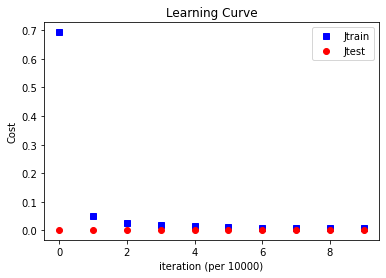

In [22]:
plt.plot(costs_tr, 'bs', label='Jtrain')
plt.plot(costs_ts, 'ro', label='Jtest')
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.ylabel('Cost')
plt.xlabel('iteration (per 10000)')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

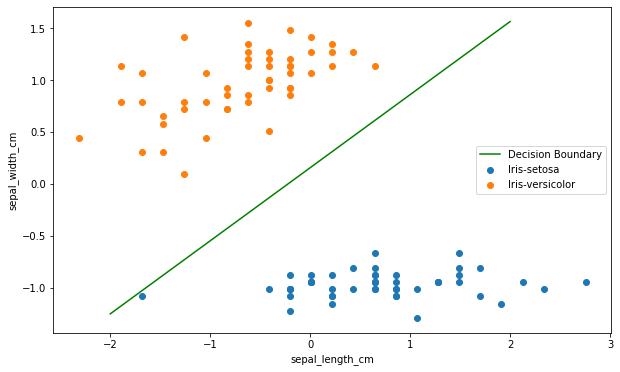

In [34]:
plt.figure(figsize=(10,6))

plt.plot([-2,2],[-(w[0][0]/w[0][1])*(-2)-(b/w[0][1]) , -(w[0][0]/w[0][1])*2-(b/w[0][1])],label='Decision Boundary',color='green' )
plt.scatter(inp_df[:50,1],inp_df[:50,2],label='Iris-setosa')
plt.scatter(inp_df[50:,1],inp_df[50:,2],label='Iris-versicolor')

plt.legend()
plt.xlabel('sepal_length_cm')
plt.ylabel('sepal_width_cm')
plt.show()

## 3.
### (a)
SVM functions:

In [2]:
def hinge(X,y,theta):                        #for maximum-margin classification
    
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta):
    m = float(len(y))
    theta2 = np.square(theta[1:])
    cost = (1/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost

def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]
    
    fx = np.multiply(y,(X_b.dot(theta)))
    
    check = np.less(fx,np.ones(fx.shape))
    
    check = np.where(check==True,1,0)
    
    return check

def subgradient_descent(X,y,theta,iterations=100):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha = learning rate
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])
    
    X_b = np.c_[np.ones((len(X),1)),X]
    
    cost_history = np.zeros(iterations)
    
    theta_history = np.zeros((iterations,X_b.shape[1]))
    alpha=0.1
    I=int(iterations/20)
    for it in range(iterations):
        if it % I == -1:
            alpha/=2
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*theta[1:]/m
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta)
        
    return theta, cost_history, theta_history

# Initialize (with quadratic terms)

In [3]:
N=[200, 30]
mu = -1  #chemical potential

def init_samples(N, mu):
    KX=[np.pi*np.array([np.random.random() for i in range(j)]).reshape((j,1)) for j in N] #list of kx_list with different N
    KY=[np.pi*np.array([np.random.random() for i in range(j)]).reshape((j,1)) for j in N]

    E=[[float(-2*(np.cos(KX[k][i])+np.cos(KY[k][i]))) for i in range(N[k])] for k in range(len(N))]
    #print(E)
    occupancy_list=[[E[k][i]<=mu for i in range(N[k])] for k in range(len(N))]

    return KX, KY, occupancy_list

KX, KY, occupancy_list = init_samples(N, mu)

# SVM

In [4]:
y = [np.where(occupancy_list[k],1.,-1.).reshape((N[k],1)) for k in range(len(N))] 
X=[np.array([KX[k][:,0], KY[k][:,0], KX[k][:,0]**2, KY[k][:,0]**2, KX[k][:,0]*KY[k][:,0]]) for k in range(len(N))] #5 features
for i in range(len(N)):
    X[i] = X[i].T
theta = np.random.random((X[0].shape[1]+1,1))
print(theta.size)

6


In [5]:
n_iter = 50000
cost_list = [] #n-th element corresponds to result of sample size N[n]
for i in range(len(N)):
    theta,cost_history,theta_history = subgradient_descent(X[i],y[i],theta,n_iter)
    cost_list.append([theta, cost_history, theta_history])
for i in range(len(N)):
    print('Final \N{GREEK CAPITAL LETTER THETA} for %d sample is :\n' % N[i], cost_list[i][0])
    print('Final Cost for %d sample is :' % N[i], cost_list[i][1][-1])
    print("\n")

Final Θ for 200 sample is :
 [[ 86.65010105]
 [ -3.26667773]
 [ -7.07579583]
 [-16.06267623]
 [-14.096603  ]
 [-11.89574054]]
Final Cost for 200 sample is : 1.6532629975765176


Final Θ for 30 sample is :
 [[ 9.55010105]
 [-0.38135342]
 [-0.58932505]
 [-1.76857117]
 [-1.74665282]
 [-0.91429851]]
Final Cost for 30 sample is : 0.12512193776855113




In [6]:
# generate testing data
R = 200
kx_test=np.pi*np.array([np.random.random() for i in range(R)]).reshape((R,1))
ky_test=np.pi*np.array([np.random.random() for i in range(R)]).reshape((R,1))
E_test=[float(-2*(np.cos(kx_test[i])+np.cos(ky_test[i]))) for i in range(R)]
#print(E)
occupancy_test=[E_test[i]<=mu for i in range(R)]
#print(occupancy)
y_test = np.where(occupancy_test,1.,-1.).reshape((R,1))
X_test=np.array([kx_test[:,0], ky_test[:,0], kx_test[:,0]**2, ky_test[:,0]**2,kx_test[:,0]*ky_test[:,0]])
X_test=X_test.T
X_b_test = np.c_[np.ones((len(X_test),1)),X_test]

In [7]:
# accuracy check
predictions = np.dot(X_b_test, cost_list[0][0])
print('The accuracy for {} sample case is {:.1%}'.format(N[0], np.mean(predictions * y_test > 0)))
predictions = np.dot(X_b_test, cost_list[1][0])
print('The accuracy for {} sample case is {:.1%}'.format(N[1], np.mean(predictions * y_test > 0)))

The accuracy for 200 sample case is 98.5%
The accuracy for 30 sample case is 98.0%


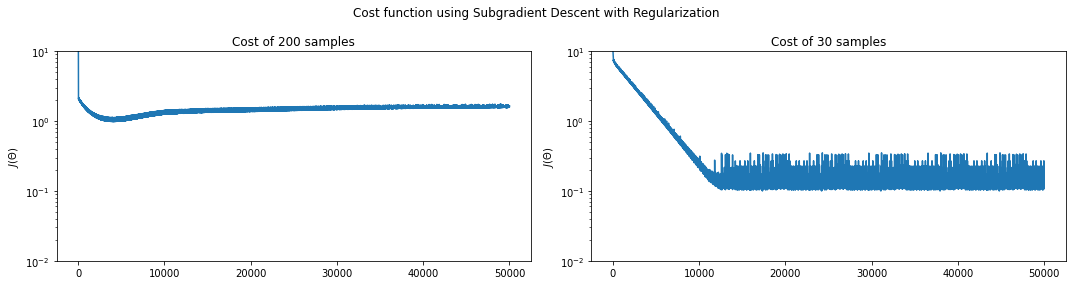

In [8]:
myfig, myaxes = plt.subplots(1, len(N))
myfig.set_figwidth(15)
myfig.suptitle("Cost function using Subgradient Descent with Regularization")

for i in range(len(N)):
    myaxes[i].set_title("Cost of %d samples" % N[i])
    myaxes[i].set_ylabel("$J(\Theta)$")
    myaxes[i].set_yscale('log')
    myaxes[i].set_ylim([10**-2, 10**1])
    myaxes[i].plot(cost_list[i][1])

myfig.tight_layout()
myfig.show()

In [9]:
def plot_fermi_surface(myaxe, i, x_plot, y_plot, XX, YY, kx_list, ky_list, occupancy, theta):
    myaxe.plot(x_plot,y_plot,label='Fermi Surface')
    myaxe.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
    myaxe.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
    myaxe.contour(XX,YY, theta[0]+theta[1]*XX+theta[2]*YY+theta[3]*XX**2+theta[4]*YY**2+theta[5]*XX*YY,[0])
    myaxe.legend(loc='upper right')
    myaxe.set_xlim(0,np.pi)
    myaxe.set_ylim(0,np.pi)
    myaxe.set_xlabel('$k_x$')
    myaxe.set_ylabel('$k_y$')
    myaxe.set_xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
    myaxe.set_yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])

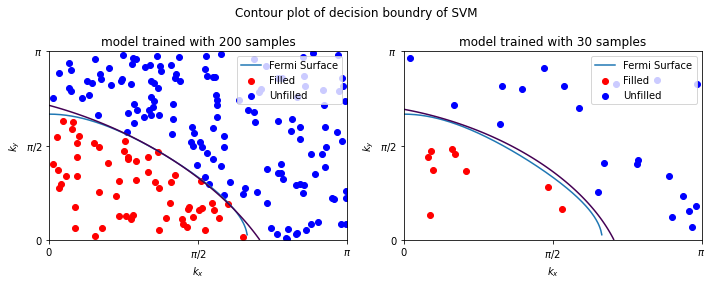

In [10]:
x_plot=np.arange(0, np.pi, 0.01)
y_plot=np.arccos(-mu/2-np.cos(x_plot))
[XX,YY]=np.meshgrid(x_plot,x_plot)

myfig, myaxes = plt.subplots(1, 2)

for i in range(len(N)):
    myaxes[i].set_title('model trained with %d samples' % N[i])
    plot_fermi_surface(myaxes[i], i, x_plot, y_plot, XX, YY, KX[i], KY[i], occupancy_list[i], cost_list[i][0])

myfig.suptitle('Contour plot of decision boundry of SVM')
myfig.set_figwidth(10)
myfig.tight_layout()
myfig.show()

# Logistic Regression
## Logistic regression functions

In [11]:
import numpy as np
from scipy.optimize import fmin_tnc


class LogisticRegressionUsingGD:

    def __init__(self):
        self.cost_history = []

# Activation function used to map any real value between 0 and 1
    @staticmethod
    def sigmoid(x):  
        return 1 / (1 + np.exp(-x))

# Computes the weighted sum of inputs Similar to Linear Regression
    @staticmethod
    def net_input(theta, x):
        return np.dot(x, theta)

# Calculates the probability that an instance belongs to a particular class
    def probability(self, theta, x):
        return self.sigmoid(self.net_input(theta, x))

# Computes the cost function for all the training samples
    def cost_function(self, theta, x, y):
        m = x.shape[0]
        total_cost = -(1 / m) * np.sum([np.log(self.probability(theta, x[i])) if y[i]==1 else np.log(1-self.probability(theta, x[i])) for i in range(m)])
        return total_cost

# Computes the gradient of the cost function at the point theta
    def gradient(self, theta, x, y):     
        m = x.shape[0]
        return (1 / m) * np.dot(x.T, self.sigmoid(self.net_input(theta, x)) - y)

    def fit(self, x, y, theta,iterations=1000):
        alpha=0.1
        I=int(iterations/20)
        for it in range(iterations):
            if it % I == -1:
                alpha/=2
            theta=theta-alpha*self.gradient(theta, x, y)
            self.cost_history.append(self.cost_function(theta, x, y))
        self.w_ = theta[:,0]
        return self

    def predict(self, x):
        theta = self.w_[:, np.newaxis]
        return self.probability(theta, x)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(x) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy * 100

In [12]:
y = [np.where(occupancy_list[i],1.,0.).reshape((N[i],1)) for i in range(len(N))] #logistic regression encode in {0, 1}
#print(y)
X_b = [] #original X.T plus a column of 1s
for i in range(len(N)):
    X_b.append(np.c_[np.ones((len(X[i]),1)),X[i]]) #append row of 1s to X and transpose
theta = [np.zeros((X_b[0].shape[1], 1)) for i in range(len(N))]
# change testing data encoding to {0, 1} for logistic regression
y_test = np.where(occupancy_test,1.,0.).reshape((R,1))

In [14]:
n_itr=50000
accuracy = []
parameters = []
cost_history = []
model = [LogisticRegressionUsingGD(), LogisticRegressionUsingGD()]
for i in range(len(N)):
    model[i].fit(X_b[i], y[i], theta[i], n_itr)
    accuracy.append(model[i].accuracy(X_b_test, y_test.flatten()))
    parameters.append(model[i].w_)
    cost_history.append(model[i].cost_history)
    print("The accuracy of the model for {} samples is {}".format(N[i], accuracy[i]))
    print("The model parameters for %d samples got by Gradient descent:" % N[i])
    print(parameters[i])
    print('\n')

The accuracy of the model for 200 samples is 98.5
The model parameters for 200 samples got by Gradient descent:
[13.14309411  5.8510107   5.49780819 -5.27217638 -5.17370378 -5.65911739]


The accuracy of the model for 30 samples is 96.5
The model parameters for 30 samples got by Gradient descent:
[11.30080843  5.0734277   5.19134131 -5.06280952 -5.46996627 -2.98308465]




In [15]:
print('Final cost for {} sample is {}'.format(N[0], model[0].cost_history[-1]))
print('Final cost for {} sample is {}'.format(N[1], model[1].cost_history[-1]))

Final cost for 200 sample is 0.02009771763542859
Final cost for 30 sample is 0.0025996378088873453


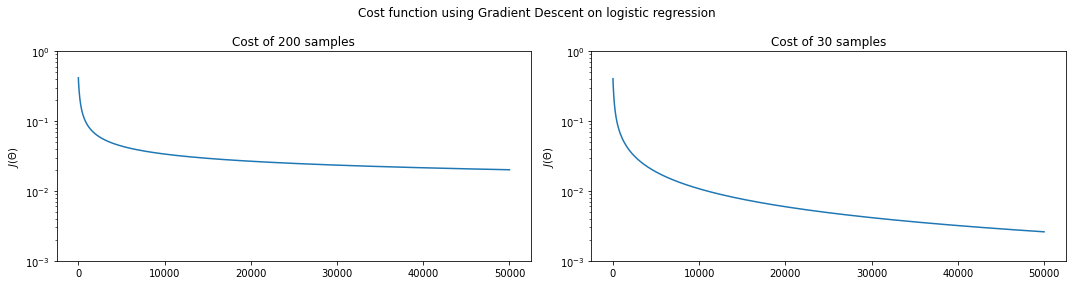

In [16]:
myfig, myaxes = plt.subplots(1, len(N))
myfig.set_figwidth(15)
myfig.suptitle("Cost function using Gradient Descent on logistic regression")

for i in range(len(N)):
    myaxes[i].set_title("Cost of %d samples" % N[i])
    myaxes[i].set_ylabel("$J(\Theta)$")
    myaxes[i].set_yscale('log')
    myaxes[i].set_ylim([10**-3, 10**0])
    myaxes[i].plot(cost_history[i])

myfig.tight_layout()
myfig.show()

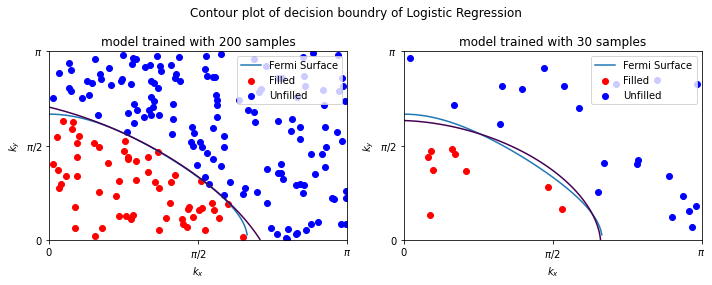

In [17]:
x_plot=np.arange(0, np.pi, 0.01)
y_plot=np.arccos(-mu/2-np.cos(x_plot))
[XX,YY]=np.meshgrid(x_plot,x_plot)

myfig, myaxes = plt.subplots(1, 2)

for i in range(len(N)):
    myaxes[i].set_title('model trained with %d samples' % N[i])
    plot_fermi_surface(myaxes[i], i, x_plot, y_plot, XX, YY, KX[i], KY[i], occupancy_list[i], parameters[i])

myfig.suptitle('Contour plot of decision boundry of Logistic Regression')
myfig.set_figwidth(10)
myfig.tight_layout()
myfig.show()

### (b)
SVM functions:

In [2]:
def hinge(X,y,theta):                        #for maximum-margin classification
    pred = 1 - np.multiply(y,(X.dot(theta)))
    loss = np.maximum(np.zeros(pred.shape),pred)
    hinge = np.sum(loss)
    return hinge

def computeCost(X,y,theta):
    m = float(len(y))
    theta2 = np.square(theta[1:])
    cost = (1/(2*m)) * np.sum(theta2) + (1/m) * hinge(X,y,theta)
    return cost
def check(X,y,theta):
    X_b = np.c_[np.ones((len(X),1)),X]

    fx = np.multiply(y,(X_b.dot(theta)))

    check = np.less(fx,np.ones(fx.shape))

    check = np.where(check==True,1,0)

    return check

def subgradient_descent(X,y,theta,iterations=100):
    '''
    X    = Matrix of X
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    alpha
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = float(y.shape[0])

    X_b = np.c_[np.ones((len(X),1)),X]

    cost_history = np.zeros(iterations)

    theta_history = np.zeros((iterations,X_b.shape[1]))
    alpha=0.1
    I=int(iterations/20)
    for it in range(iterations):
        if it % I == -1:
            alpha /=2
        #print(X_b.shape)
        #print(X_b.dot(theta).shape)
        #print(np.multiply(y,(X_b.dot(theta))).shape)
        #print(y.shape)
        theta = theta + alpha*((np.multiply(check(X,y,theta),y)).T.dot(X_b)).T
        theta[1:] = theta[1:] - alpha*theta[1:]/m
        theta_history[it,:] = theta.T
        cost_history[it]  = computeCost(X_b,y,theta)

    return theta, cost_history, theta_history

Data generation :

In [3]:
def generatedata(N,mu):
    kx_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))
    ky_list=np.pi*np.array([np.random.random() for i in range(N)]).reshape((N,1))

    E=[float(-2*(np.cos(kx_list[i])+np.cos(ky_list[i]))) for i in range(N)]
    occupancy=[E[i]<=mu for i in range(N)]
    y = np.where(occupancy,1.,-1.).reshape((N,1))
   
    return kx_list,ky_list,E,occupancy,y






###  Training and testing sets

Run SVM for $X_1$ and $X_2$ with $N_{training} = 30$ for $50$ times.

Generate a testing set with $N_{testing} = 1000$ and compare the accruacy score between $X_1$ and $X_2$.

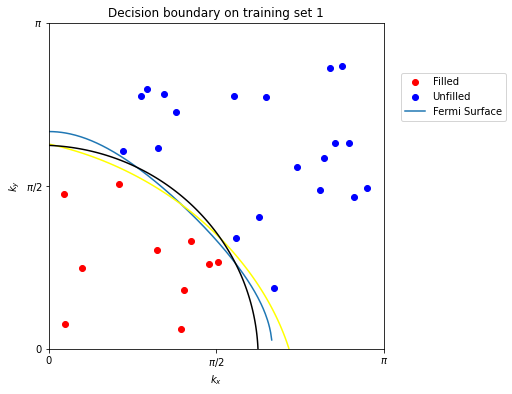

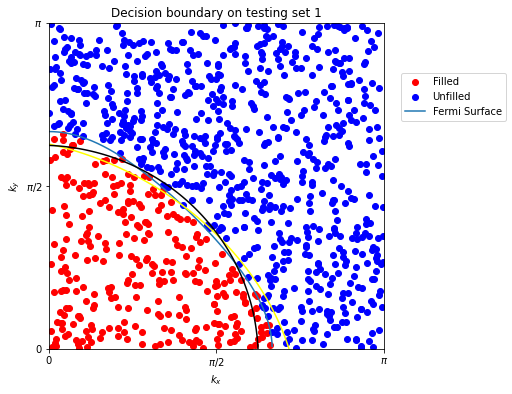

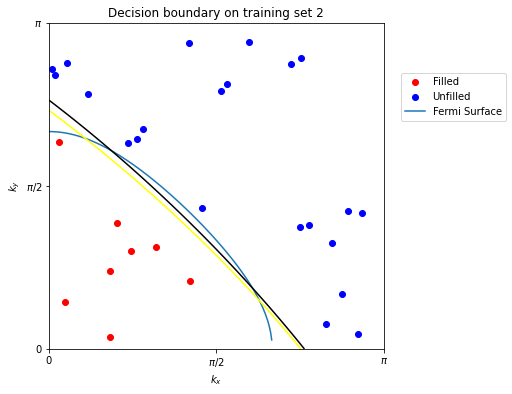

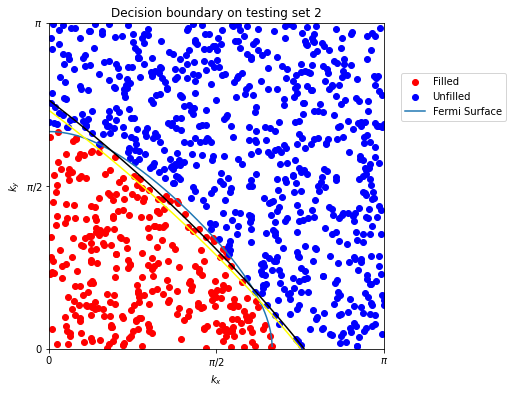

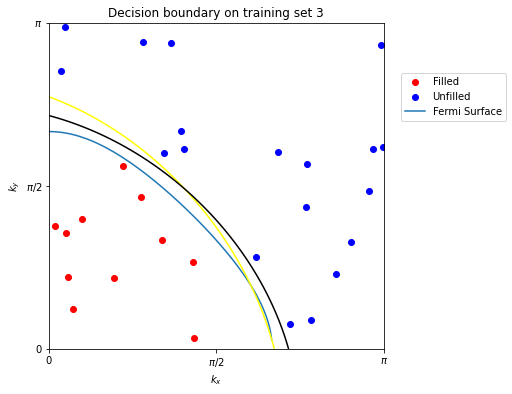

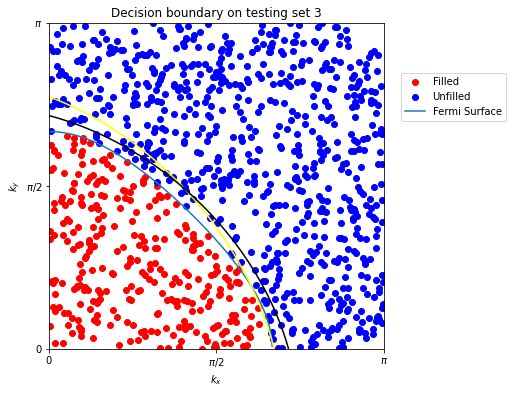

In [51]:
def runSVM(X,y,n_iter):
    X=X.T
    theta = np.random.random((X.shape[1]+1,1))
    theta,cost_history,theta_history = subgradient_descent(X,y,theta,n_iter)
    
    return theta,cost_history

N=30
mu=-1   
n_iter = 25000



finalcost1 = []
finalcost2 = []
acclist1 = []
acclist2 = []
#Run 50 training and testing sets
testnum = 50
for i in range(testnum):
    #Training Set
    kx_list,ky_list,E,occupancy,y = generatedata(N,mu)
    X1 = np.array([kx_list[:,0], ky_list[:,0], kx_list[:,0]**2, ky_list[:,0]**2,kx_list[:,0]*ky_list[:,0]])
    X2 = np.array([kx_list[:,0] + ky_list[:,0] ,  kx_list[:,0]**2 + ky_list[:,0]**2 , kx_list[:,0]*ky_list[:,0]])
    
    theta_1,cost_his1 = runSVM(X1,y,n_iter)
    theta_2,cost_his2 = runSVM(X2,y,n_iter)
    finalcost1.append(cost_his1[-1])
    finalcost2.append(cost_his2[-1])
    
    
    
    #Plot a few samples
    if i < 3:
        x_plot=np.arange(0, np.pi, 0.01)
        y_plot=np.arccos(-mu/2-np.cos(x_plot))
        [XX,YY]=np.meshgrid(x_plot,x_plot)
        plt.figure(figsize=(6,6))
        plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
        plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
        plt.plot(x_plot,y_plot,label='Fermi Surface')
        
    
        plt.contour(XX,YY, theta_1[0]+theta_1[1]*XX+theta_1[2]*YY+theta_1[3]*XX**2+theta_1[4]*YY**2+theta_1[5]*XX*YY,[0],colors='yellow')
        plt.contour(XX,YY, theta_2[0]+theta_2[1]*(XX+YY)+theta_2[2]*(XX**2+YY**2)+theta_2[3]*XX*YY,[0],colors='black')
        
        
        plt.legend(loc=(1.05,0.7))
        plt.title(f"Decision boundary on training set {i+1}")
        plt.xlim(0,np.pi)
        plt.ylim(0,np.pi)
        plt.xlabel('$k_x$')
        plt.ylabel('$k_y$')
        plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
        plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
        plt.show()
        
        
    
    
    #Testing Set
    testn=1000
    testkx,testky,Etest,occupancytest,ytest = generatedata(testn,mu)
    #acc for X1
    E_X1=[float(theta_1[0]+theta_1[1]*testkx[i]+theta_1[2]*testky[i]+theta_1[3]*testkx[i]**2+theta_1[4]*testky[i]**2+theta_1[5]*testkx[i]*testky[i]) for i in range(testn)]
    occupancyX1=[E_X1[i]>0 for i in range(testn)]
   
    accX1 = 0
    for j in range(testn):
        if occupancyX1[j] == occupancytest[j]:
            accX1+=1
    accX1 = accX1/testn
    acclist1.append(accX1)
    
    #acc for X2
    E_X2=[float(theta_2[0]+theta_2[1]*(testkx[i]+testky[i])+theta_2[2]*(testkx[i]**2+testky[i]**2)+theta_2[3]*testkx[i]*testky[i]) for i in range(testn)]
    occupancyX2=[E_X2[i]>0 for i in range(testn)]
    accX2 = 0
    for j in range(testn):
        if occupancyX2[j] == occupancytest[j]:
            accX2+=1
    accX2 = accX2/testn
    acclist2.append(accX2)
    
    
    if i < 3:
        x_plot=np.arange(0, np.pi, 0.001)
        y_plot=np.arccos(-mu/2-np.cos(x_plot))
        [XX,YY]=np.meshgrid(x_plot,x_plot)
        plt.figure(figsize=(6,6))
        plt.scatter(testkx[occupancytest], testky[occupancytest], c='r',label='Filled')
        plt.scatter(testkx[np.invert(occupancytest)], testky[np.invert(occupancytest)], c='b',label='Unfilled')
        plt.plot(x_plot,y_plot,label='Fermi Surface')
        
    
        plt.contour(XX,YY, theta_1[0]+theta_1[1]*XX+theta_1[2]*YY+theta_1[3]*XX**2+theta_1[4]*YY**2+theta_1[5]*XX*YY,[0],colors='yellow')
        plt.contour(XX,YY, theta_2[0]+theta_2[1]*(XX+YY)+theta_2[2]*(XX**2+YY**2)+theta_2[3]*XX*YY,[0],colors='black')
        plt.legend(loc=(1.05,0.7))
        plt.title(f"Decision boundary on testing set {i+1}")
        plt.xlim(0,np.pi)
        plt.ylim(0,np.pi)
        plt.xlabel('$k_x$')
        plt.ylabel('$k_y$')
        plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
        plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
        plt.show()
    
    
    
    
    

In [52]:
total = 0
for i in range(testnum):
    if acclist2[i] >= acclist1[i]:
        total += 1
print('Percentage of X2 is better than X1 in testing set: ',total/testnum)

Percentage of X2 is better than X1 in testing set:  0.8


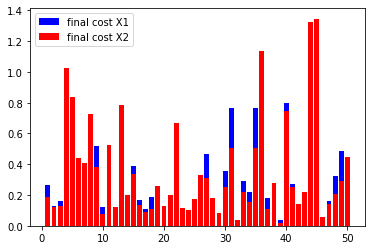

In [53]:
testno = range(1,testnum+1)
plt.bar(testno,finalcost1,color = 'blue', label = 'final cost X1')
plt.bar(testno,finalcost2,color = 'red', label = 'final cost X2')
plt.legend()
plt.show()

In testing sets, X2 performs better than X1 and the comparison between costs gives no obvious conclusion.
Therefore, the symmetric feature can reduce overfitting.


### Try a new feature $X_3$

The real surface is $cos(x) + cos(y) = -\frac{\mu}{2}$ so try $X_3 = [\cos(k_x)+\cos(k_y)]$ and use very few samples $N=10$

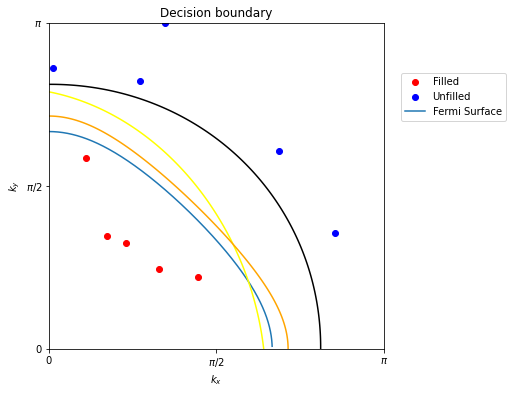

[[-1.27008592]
 [ 3.37240841]]


In [57]:
kx_list,ky_list,E,occupancy,y = generatedata(10,mu)
X1 = np.array([kx_list[:,0], ky_list[:,0], kx_list[:,0]**2, ky_list[:,0]**2,kx_list[:,0]*ky_list[:,0]])
X2 = np.array([kx_list[:,0] + ky_list[:,0] ,  kx_list[:,0]**2 + ky_list[:,0]**2 , kx_list[:,0]*ky_list[:,0]])
X3 = np.array([np.cos(kx_list[:,0]) + np.cos(ky_list[:,0])])

theta_1,cost_his1 = runSVM(X1,y,n_iter)
theta_2,cost_his2 = runSVM(X2,y,n_iter)
theta_3,cost_his3 = runSVM(X3,y,n_iter)


x_plot=np.arange(0, np.pi, 0.001)
y_plot=np.arccos(-mu/2-np.cos(x_plot))
[XX,YY]=np.meshgrid(x_plot,x_plot)
plt.figure(figsize=(6,6))
plt.scatter(kx_list[occupancy], ky_list[occupancy], c='r',label='Filled')
plt.scatter(kx_list[np.invert(occupancy)], ky_list[np.invert(occupancy)], c='b',label='Unfilled')
plt.plot(x_plot,y_plot,label='Fermi Surface')
        
    

plt.contour(XX,YY, theta_1[0]+theta_1[1]*XX+theta_1[2]*YY+theta_1[3]*XX**2+theta_1[4]*YY**2+theta_1[5]*XX*YY,[0],colors='yellow')
plt.contour(XX,YY, theta_2[0]+theta_2[1]*(XX+YY)+theta_2[2]*(XX**2+YY**2)+theta_2[3]*XX*YY,[0],colors='black')
plt.contour(XX,YY, theta_3[0]+theta_3[1]*(np.cos(XX)+np.cos(YY)),[0],colors='orange')      
        
plt.legend(loc=(1.05,0.7))
plt.title("Decision boundary")
plt.xlim(0,np.pi)
plt.ylim(0,np.pi)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.xticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.yticks([0, np.pi/2, np.pi], ['0', '$\pi/2$', '$\pi$'])
plt.show()
print(theta_3)

The surface given by $X_3$ is $cos(x)+cos(y) = \frac{\text{-theta_3[0]}}{\text{theta_3[1]}}$